### 数据清洗和绘图观察数据

In [3]:
import pandas as pd
import re

# 查看数据的基本格式
df = pd.read_csv('./JianShuJiaoYou-All-Data.csv',encoding='utf-8')

'''
对数据进行预处理
'''
# eval函数：就是实现list、dict、tuple与str之间的转化
# 新增'Images_Num'列，存储每篇文章中的配图数目
def getImagesNum(imageList):
    return len(eval(imageList))

# 统计下每篇文章的字数
def getArticleLength(articleContent):
    return len(articleContent)

# 对Time属性进行拆分
def getYMD(timestamp):
    ymd = timestamp.split('T')[0]
    return ymd

def getYear(ymd):
    year = ymd.split('-')[0]
    return year

def getMonth(ymd):
    month = ymd.split('-')[1]
    return month

def getDay(ymd):
    day = ymd.split('-')[-1]
    return day

def getHour(timestamp):
    rawhour = timestamp.split('T')[1].split('+')[0][:2]     
    hour = re.sub(r'^(0+)','',str(rawhour))
    if hour == '':
        hour = '0'
    return hour

df['Images_Num'] = df['Image_Url'].apply(getImagesNum)
df['Artical_Length'] = df['Artical_Content'].apply(getArticleLength)
df['YMD'] = df['Time'].apply(getYMD)
df['Year'] = df['YMD'].apply(getYear)
df['Month'] = df['YMD'].apply(getMonth)
df['Day'] = df['YMD'].apply(getDay)
df['Hour'] = df['Time'].apply(getHour)

df.head(1)

,Page,Num,Author,Author_Url,Title,Time,Read,Comment,Like,Abstract,Artical_Url,Image_Url,Artical_Content,Images_Num,Artical_Length,YMD,Year,Month,Day,Hour
0,1,0,刘秀玲,https://www.jianshu.com/u/470f33ea0c92,我要嫁这样的你,2016-07-25T12:16:39+08:00,109763,4508,5333,你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...,https://www.jianshu.com/p/8de3d395734f,['//upload-images.jianshu.io/upload_images/125...,你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...,4,1269,2016-07-25,2016,07,25,12


Text(0,0.5,'文章数量')

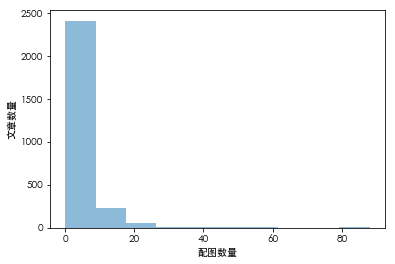

In [4]:
import matplotlib.pyplot as plt
import matplotlib

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

# 内嵌画图，可以省去plt.show()
%matplotlib inline
plt.hist(df['Images_Num'],alpha=0.5)
plt.xlabel('配图数量')
plt.ylabel('文章数量')

613     7
227     7
1195    6
412     6
327     6
428     6
243     6
251     6
289     6
208     6
228     5
510     5
231     5
621     5
229     5
193     5
381     5
692     5
807     5
294     5
479     5
217     5
385     5
316     5
518     5
558     5
366     5
461     5
407     5
333     5
       ..
205     1
2262    1
2284    1
237     1
2294    1
2158    1
257     1
259     1
2318    1
271     1
283     1
287     1
195     1
2238    1
183     1
181     1
167     1
165     1
161     1
159     1
2206    1
2196    1
141     1
137     1
380     1
131     1
2178    1
119     1
2166    1
2051    1
Name: Artical_Length, Length: 1553, dtype: int64


Text(0,0.5,'文章数量')

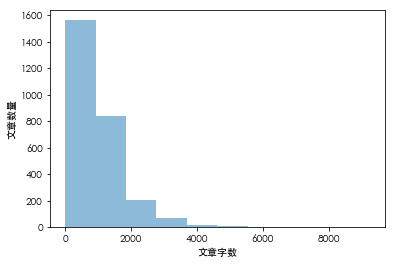

In [5]:
# 显示文章长度和文章数量的关系
print(df['Artical_Length'].value_counts())
plt.hist(df['Artical_Length'],alpha=0.5)
plt.xlabel('文章字数')
plt.ylabel('文章数量')

In [6]:
# 绘图显示发文章时间规律
print(df['Hour'].value_counts())

22    201
16    181
23    180
10    175
15    164
21    162
17    162
18    153
11    151
19    150
20    147
14    141
13    133
0     132
12    113
9     112
8      78
1      53
7      42
2      35
6      29
3      13
5       6
4       5
Name: Hour, dtype: int64


Text(0,0.5,'文章配图数量')

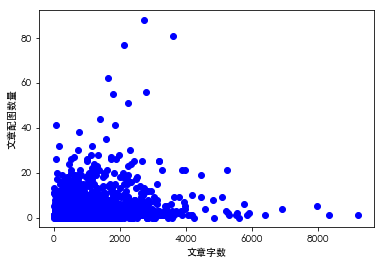

In [7]:
# 查看文章字数和配图数的关系
plt.scatter(df['Artical_Length'],df['Images_Num'],marker='o',color='blue')
plt.xlabel('文章字数')
plt.ylabel('文章配图数量')

Text(0,0.5,'文章点赞数')

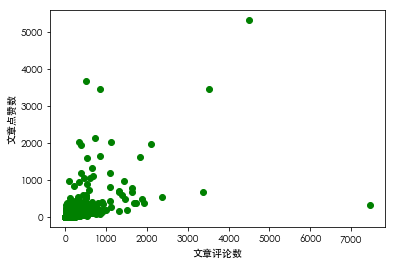

In [8]:
# 绘图查看评论数和点赞数的关系
plt.scatter(df['Comment'],df['Like'],marker='o',color='green')
plt.xlabel('文章评论数')
plt.ylabel('文章点赞数')

Text(0.5,0,'评论')

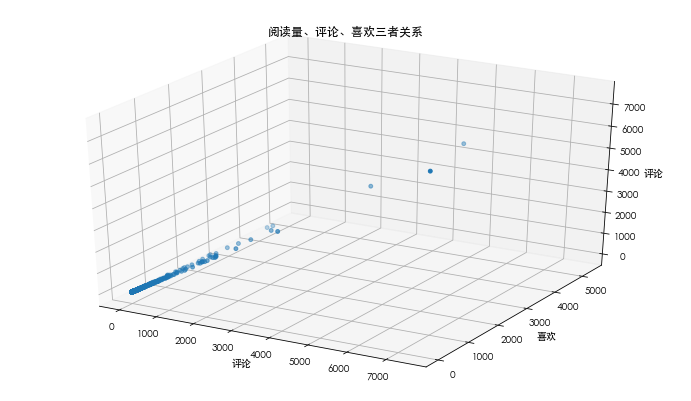

In [9]:
# 查看阅读量、评论数与点赞数这三者的关系
from mpl_toolkits.mplot3d import Axes3D

# 创建一个3维绘图工程
plt.figure(figsize=(12, 7))
ax = plt.subplot(111,projection='3d')
ax.scatter(df['Comment'],df['Like'],df['Comment'],s=15)

ax.set_title('阅读量、评论、喜欢三者关系')
ax.set_zlabel('评论')
ax.set_ylabel('喜欢')
ax.set_xlabel('评论')

### 提取文章中200个关键词绘制词云

In [10]:
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

content = df['Artical_Content'].tolist()
# print(len(content),'\n',content[-1])
content[0]

'你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿能与你勾肩搭背不费劲，看夕阳西下映晚霞，不醉不归家。你不用太白，肤色直追包青天的我对“到底谁黑些”类的调侃并不介意。惟愿哪天生出孩子来，不是棕色的就行，“小斑马”也无所谓。你不用太博学，在我想谈论鲁巴茅郭老曹的时候你不是抻脖子翻白眼就行。相反，你所学专业我也愿意去了解。我不想和你睡在一张床上，思维却隔着太平洋。你不用有一间房子，我已经买下，并且不介意余生与你共享它。我们在小小的厨房里一起熬大骨汤、做红烧肉可好？你不用做饭太好吃，余生一起走，还有大把的时光提升厨艺。我可以做漂亮的蛋糕给你吃，可以陪你下遍小城的每个馆子。提前约好，我，不刷碗。你不用有一部车子，反正我还没驾驶本，以后再买也可以。我们这个月买个方向盘，下个月买个轮胎，轰鸣的梦想在柴米油盐里实现。发动机里烧着的是咱俩的工资，想想都来劲。你不用给我多少彩礼，只带着这一生的爱来。败家的我恰巧也没攒嫁妆，一车马的书姑且算作陪嫁，好不好？你甚至不用太爷们，换灯泡、修马桶、组装家具手到擒来的我真不介意偶尔扛桶纯净水上楼。在你无助的时候，我愿拥你入怀，任你哭成个孩子。因为我知道，哭过之后你会起身，再次为我站成一堵墙。但是，我也有要求：你得爱我。爱我的灵魂，因为世上只有一个它；爱我的职业，因为孩子们和我需要它；爱我的坏脾气，因为，只有我爱的你见过它。你不能瞧不起饭馆服务员和楼道清洁工。如果你是那种随口斥骂他们的人，请离开我身边。你可以因为上菜太慢和卫生清整不及时和他们反映、理论，甚至可以找经理申诉，但请不要满嘴脏话。工作性质不同而已，灵魂绝对平等，你并不比他们高贵。你不能每日得过且过，没有上进心。如果你是下班就猫在电脑前玩游戏彻夜不休的人，请离开我身边。你可以打游戏，但希望是仅供消遣，如果你不是以此为谋生手段的话。空有宏图大志难抒展，那是负能量爆棚的loser说的话。而你，该是顶天立地的男子汉。你不能太自以为是，大男子主义。如果你认为女人天生就是默默做家务不能反抗的命，请离开我身边。家是我们两个人的产业，你同样有经营的义务。相信你想找的，也是并肩作战的伙伴，而不是伺候你吃喝拉撒的老妈子。你不能不热爱读书，一嘴的读书无用论。“书籍是人类进步的阶梯”这句话永远是真理，正是它给了我真实而广阔的世界。每个人都是流浪在天地之间的孩子，是书让

In [11]:
# 载入停用词
# quoting : int or csv.QUOTE_* instance, default 0
# 控制csv中的引号常量。可选 QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3)
 
stopwords = pd.read_csv('./chinesestopword.txt',sep='\n',encoding='utf-8',names=['stopwords'],header=None,quoting=3)
# 默认输出5个
stopwords.head()

,stopwords
0,!
1,""""
2,#
3,$
4,%


In [12]:
# 结巴分词
import re
import jieba
pattern = re.compile('\d+')

from collections import Counter
# 存放词语和词频
wordsCounter = Counter()

for line in content:
    segs = jieba.lcut(line)
    for seg in segs:
        if len(seg)>1 and seg != '\r\n' and re.search(pattern,seg)==None:
            wordsCounter[seg] += 1
# print(wordsCounter.most_common(100))
# 将Counter的键提取出来做list
segment = list(wordsCounter)

# 将分好的词列表转化为词典
words = pd.DataFrame({'segment':segment})

# 剔除停用词
words = words[~words['segment'].isin(stopwords['stopwords'])]
# words

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/gp/b3_2z14x65b1pmw5l924nd8c0000gn/T/jieba.cache
Loading model cost 0.864 seconds.
Prefix dict has been built succesfully.


In [13]:
# 绘制词云
from pyecharts import WordCloud

def counter2list(_counter):
    wordslist,nums = [],[]
    for item in _counter:
        wordslist.append(item[0])
        nums.append(item[1])
    return wordslist,nums

outputFile = './result/文章关键词词云图.html'

# 这个关键词抽取方法不唯一
wordslist,nums = counter2list(wordsCounter.most_common(1000))

cloud = WordCloud('文章关键词词云', width=1200, height=600, title_pos='center')
cloud.add(
    ' ',wordslist,nums,
    shape='circle',
    background_color='white',
    max_words=1000 
)
cloud.render(outputFile)

### word2vec模型计算词的相似度

In [14]:
import jieba.analyse

# 基于TF-IDF算法的关键词抽取
contentStr = ''.join(content)
# keyWordsList = jieba.analyse.extract_tags(contentStr,topK=200,allowPOS=('ns','n'))
# textrank1 = ' '.join(keyWordsList)
# textrank1

In [15]:
# 基于TextRank算法进行关键词抽取
textrank2 = ' '.join(jieba.analyse.textrank(contentStr,topK=200,allowPOS=('ns','n')))
textrank2

'时候 简书 朋友 文章 大家 交友 时间 大学 文字 故事 简友 感觉 老师 我会 爱情 学校 专题 世界 职业 人生 投稿 电影 地方 有点 作者 城市 东西 同学 学生 树洞 地点 经历 事情 照片 读书 孩子 问题 专业 毕业 性格 姑娘 北京 校园 交流 小说 昵称 女生 上海 摄影 手机 内心 女孩 中国 个人 梦想 星座 父母 名字 男生 音乐 青春 年龄 家乡 时光 感情 文学 对方 文化 样子 无法 公司 美丽 素材 文艺 社会 记录 哥哥 灵魂 妈妈 单身 美食 日子 家庭 回家 情书 平台 心情 关系 结果 性别 原因 能力 眼睛 方面 咖啡 编辑 唱歌 游戏 评论 小时 现实 画画 声音 小时候 历史 姐姐 情感 理想 方式 跑步 男人 想象 凡人 图书馆 内容 时代 见面 大赛 身体 衣服 宿舍 嘉宾 女人 总会 公众 风景 学会 陌生 兴趣 基本 学历 精神 成都 先生 好友 校友 习惯 作品 教室 艺术 思想 小学 男朋友 线下 联系 社群 武汉 家人 信息 模样 礼物 世间 长大 味道 陌生人 广州 父亲 朋友圈 印象 机会 女性 体重 空间 妹子 玫瑰 记忆 婚姻 人们 重庆 热情 杭州 计划 情况 读者 男孩 西安 小伙伴 励志 会员 少女 火车 体验 深圳 幻想 人物 陪伴 情绪 人家 意义 室友 大学生 国家 女孩子 山东 状态 程序员 天空 链接 思维 标准'

In [16]:
# 利用word2vec找出关联词语，将语料整理成嵌套列表的形式
corpus = []

# 将停用词dataFrame转化为列表
stopwordsList = stopwords['stopwords'].tolist()
# print(stopwordsList[:10])
for line in content:
    segs = jieba.lcut(line)
    segs = filter(lambda x:len(x)>1, segs)
    segs = filter(lambda x:re.search(pattern,x)==None, segs)
    segs = filter(lambda x:x not in stopwordsList, segs)
    
    corpus.append(list(segs))
    
corpus[0]

['不用',
 '太高',
 '比穿',
 '三五',
 '厘米',
 '小鸟依人',
 '我愿',
 '勾肩搭背',
 '费劲',
 '夕阳西下',
 '晚霞',
 '不醉',
 '不归家',
 '不用',
 '太白',
 '肤色',
 '直追',
 '包青天',
 '黑些',
 '调侃',
 '不介意',
 '惟愿',
 '天生',
 '孩子',
 '棕色',
 '斑马',
 '无所谓',
 '不用',
 '博学',
 '谈论',
 '鲁巴茅',
 '郭老',
 '脖子',
 '翻白眼',
 '就行',
 '所学',
 '专业',
 '不想',
 '一张',
 '床上',
 '思维',
 '太平洋',
 '不用',
 '一间',
 '房子',
 '买下',
 '不介意',
 '余生',
 '共享',
 '小小的',
 '厨房',
 '熬大骨',
 '红烧肉',
 '不用',
 '做饭',
 '好吃',
 '余生',
 '时光',
 '提升',
 '厨艺',
 '漂亮',
 '蛋糕',
 '下遍',
 '小城',
 '馆子',
 '提前',
 '不刷',
 '不用',
 '一部',
 '车子',
 '反正',
 '驾驶本',
 '买个',
 '方向盘',
 '下个月',
 '买个',
 '轮胎',
 '轰鸣',
 '梦想',
 '柴米油盐',
 '发动机',
 '烧着',
 '咱俩',
 '工资',
 '想想',
 '来劲',
 '不用',
 '彩礼',
 '只带',
 '一生',
 '爱来',
 '败家',
 '嫁妆',
 '车马',
 '算作',
 '陪嫁',
 '好不好',
 '不用',
 '太爷',
 '灯泡',
 '马桶',
 '组装',
 '家具',
 '手到擒来',
 '不介意',
 '纯净水',
 '上楼',
 '无助',
 '我愿',
 '入怀',
 '成个',
 '孩子',
 '哭过',
 '起身',
 '一堵',
 '灵魂',
 '世上',
 '职业',
 '孩子',
 '坏脾气',
 '瞧不起',
 '饭馆',
 '服务员',
 '楼道',
 '清洁工',
 '那种',
 '随口',
 '斥骂',
 '离开',
 '身边',
 '上菜',
 '太慢',
 '卫生',
 '清整',
 '理论',
 '经理',
 '申诉',
 '满嘴',
 '

In [17]:
# 训练模型
import multiprocessing
from gensim.models import Word2Vec

model = Word2Vec(corpus,min_count=20,sg=0,workers=multiprocessing.cpu_count())
# 查询和简书相关性比较高的词语
model.wv.most_similar(['简书'],topn=15)

[('平台', 0.9382156133651733),
 ('签约', 0.9098728895187378),
 ('小伙伴', 0.9090769290924072),
 ('书上', 0.9046341776847839),
 ('创作', 0.8906168341636658),
 ('专题', 0.8836373090744019),
 ('训练营', 0.8783448338508606),
 ('无戒', 0.8733381032943726),
 ('一位', 0.872589111328125),
 ('第一篇', 0.8713521361351013),
 ('篇文章', 0.8710741996765137),
 ('作者', 0.8698932528495789),
 ('发表', 0.8674886226654053),
 ('这篇', 0.8669565916061401),
 ('注册', 0.8633854985237122)]

### t-SNE 可视化高维数据
t-SNE是目前最为流行的一种高维数据降维的算法

In [18]:
# 调用百度云NLP进行词向量表示
from aip import AipNlp

APP_ID = '11617353'
API_KEY = 'eV2R48IOWKcLgBrZwtf0ZF7N'
SECRET_KEY = 'HHtuGb3BPGaXAguPld5r9gfrY4xCCdzh'
client = AipNlp(APP_ID, API_KEY, SECRET_KEY)

In [19]:
# 获取textrank4中Top200词语的词向量
textrankList = textrank2.split(' ')
textrankList

['时候',
 '简书',
 '朋友',
 '文章',
 '大家',
 '交友',
 '时间',
 '大学',
 '文字',
 '故事',
 '简友',
 '感觉',
 '老师',
 '我会',
 '爱情',
 '学校',
 '专题',
 '世界',
 '职业',
 '人生',
 '投稿',
 '电影',
 '地方',
 '有点',
 '作者',
 '城市',
 '东西',
 '同学',
 '学生',
 '树洞',
 '地点',
 '经历',
 '事情',
 '照片',
 '读书',
 '孩子',
 '问题',
 '专业',
 '毕业',
 '性格',
 '姑娘',
 '北京',
 '校园',
 '交流',
 '小说',
 '昵称',
 '女生',
 '上海',
 '摄影',
 '手机',
 '内心',
 '女孩',
 '中国',
 '个人',
 '梦想',
 '星座',
 '父母',
 '名字',
 '男生',
 '音乐',
 '青春',
 '年龄',
 '家乡',
 '时光',
 '感情',
 '文学',
 '对方',
 '文化',
 '样子',
 '无法',
 '公司',
 '美丽',
 '素材',
 '文艺',
 '社会',
 '记录',
 '哥哥',
 '灵魂',
 '妈妈',
 '单身',
 '美食',
 '日子',
 '家庭',
 '回家',
 '情书',
 '平台',
 '心情',
 '关系',
 '结果',
 '性别',
 '原因',
 '能力',
 '眼睛',
 '方面',
 '咖啡',
 '编辑',
 '唱歌',
 '游戏',
 '评论',
 '小时',
 '现实',
 '画画',
 '声音',
 '小时候',
 '历史',
 '姐姐',
 '情感',
 '理想',
 '方式',
 '跑步',
 '男人',
 '想象',
 '凡人',
 '图书馆',
 '内容',
 '时代',
 '见面',
 '大赛',
 '身体',
 '衣服',
 '宿舍',
 '嘉宾',
 '女人',
 '总会',
 '公众',
 '风景',
 '学会',
 '陌生',
 '兴趣',
 '基本',
 '学历',
 '精神',
 '成都',
 '先生',
 '好友',
 '校友',
 '习惯',
 '作品',
 '教室',
 '艺术',
 '思想',
 '小学',
 '男朋

In [20]:
# 整理格式 原始格式：('简书', 0.9286492277441794) 后者是特征权重
import numpy as np
words_list = []
word_vectors = []

for word in textrankList:
    try:
        data = client.wordEmbedding(word)
#         print(data)
        word_vector = data['vec']
        words_list.append(data['word'])
        word_vectors.append(word_vector)
    except:
        print('No words:{}'.format(word))
    
word_vectors = np.array(word_vectors)
print(words_list)

No words:简书
No words:简友
No words:有点
No words:小时候
No words:图书馆
No words:男朋友
No words:线下
No words:陌生人
No words:朋友圈
No words:小伙伴
No words:大学生
No words:女孩子
No words:程序员
['时候', '朋友', '文章', '大家', '交友', '时间', '大学', '文字', '故事', '感觉', '老师', '我会', '爱情', '学校', '专题', '世界', '职业', '人生', '投稿', '电影', '地方', '作者', '城市', '东西', '同学', '学生', '树洞', '地点', '经历', '事情', '照片', '读书', '孩子', '问题', '专业', '毕业', '性格', '姑娘', '北京', '校园', '交流', '小说', '昵称', '女生', '上海', '摄影', '手机', '内心', '女孩', '中国', '个人', '梦想', '星座', '父母', '名字', '男生', '音乐', '青春', '年龄', '家乡', '时光', '感情', '文学', '对方', '文化', '样子', '无法', '公司', '美丽', '素材', '文艺', '社会', '记录', '哥哥', '灵魂', '妈妈', '单身', '美食', '日子', '家庭', '回家', '情书', '平台', '心情', '关系', '结果', '性别', '原因', '能力', '眼睛', '方面', '咖啡', '编辑', '唱歌', '游戏', '评论', '小时', '现实', '画画', '声音', '历史', '姐姐', '情感', '理想', '方式', '跑步', '男人', '想象', '凡人', '内容', '时代', '见面', '大赛', '身体', '衣服', '宿舍', '嘉宾', '女人', '总会', '公众', '风景', '学会', '陌生', '兴趣', '基本', '学历', '精神', '成都', '先生', '好友', '校友', '习惯', '作品', '教室', '艺术', '思想', '小学', '联系', '社群', 

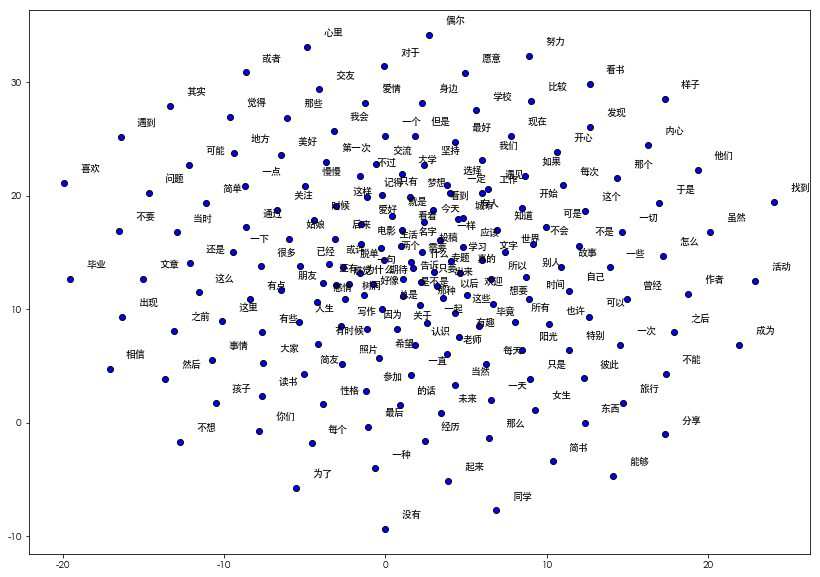

In [21]:
from sklearn.manifold import TSNE
import numpy as np

def plotTsne2D(word_vectors,words_list):
    tsne = TSNE(n_components=2,random_state=0,n_iter=10000,perplexity=20)
    # 在控制台输出过程中，默认小数会以科学计数法的形式输出，若不需要加上下面这句
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(word_vectors)
    labels = wordslist
    
    plt.figure(figsize=(14,10))
    plt.scatter(T[:,0],T[:,1],c='blue',edgecolors='k')
    
    for label,x,y in zip(labels,T[:,0],T[:,1]):
        plt.annotate(label,xy=(x+1,y+1),xytext=(0,0),textcoords='offset points')

plotTsne2D(word_vectors,words_list)

### 利用LDA算法进行主题词提取

In [22]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

# for article in corpus:
dictionary = corpora.Dictionary(corpus)
# 将 dictionary 转化为一个词袋
common_corpus = [dictionary.doc2bow(text) for text in corpus]
tfidf = models.TfidfModel(common_corpus)
corpusTfidf = tfidf[common_corpus]

lda = LdaModel(corpusTfidf, num_topics=10, id2word = dictionary, passes=20)

results = lda.print_topics(num_topics=10, num_words=3)
for res in results:
    print(res[1])

0.000*"小叔叔" + 0.000*"专科生" + 0.000*"玲玲"
0.000*"请告" + 0.000*"催收" + 0.000*"浪矢"
0.000*"小丸子" + 0.000*"姑姑" + 0.000*"杂货店"
0.000*"加群" + 0.000*"三十" + 0.000*"二维码"
0.001*"购买" + 0.001*"兼职" + 0.001*"过年"
0.002*"喜欢" + 0.002*"树洞" + 0.001*"投稿"
0.000*"七秒" + 0.000*"元清" + 0.000*"本期"
0.000*"兵法" + 0.000*"牙医" + 0.000*"主子"
0.000*"沐阳" + 0.000*"拉面" + 0.000*"南区"
0.000*"按钮" + 0.000*"皮具" + 0.000*"候嘛"


In [23]:
# 将LDA模型保存起来方便日后对新文章进行主题预测
lda.save('lda.model')
test = "生活是一座围城，但校园不是。校园是时光精心雕刻的礼物，里面到处有十几岁长发飘飘的女孩子，朝气执着的男孩子，有单纯追求的理想和生活，还有那些用心守候的友情爱情。秋天的梧桐树铺满教学楼的道路，在密密麻麻的习题中痴迷地偷看窗外的世界，静谧、自由；冬天的大雪来势汹汹，裹着厚棉袄走在冰封的湖边独自去上课，长大的世界只有自己可以取暖；春天，随着冰雪一起褪去的还有沉重的身心，但新的一年生活好像也没什么变化；夏天有吃不完的西瓜和冰棍，如果你可以和我一起逃课，我会告诉你后山夜晚的星星很美。提起校园，或许它并不精彩，重复到近乎单调，但我们都会无比怀念年轻的自己和那些有梦做的年纪。春天濛濛的细雨还没有离开大地，夏日离别的笙歌已在悄悄响起。又快到一年毕业季，「简书交友」专题携手「简书校园」、「简书会员」、「摄影」一起推出「恰同学少年」校园创作交友大赛。请将文章以以下形式投稿至「」专题、摄影作品可投稿至「」专题。本次活动设置了丰富的奖项和奖品，参赛内容可为小学到大学，培训学校等等你经历过的任何一个校园，校园必须为的大学，虚拟意义上的校园无法参赛，，所有简友仅需写出你曾经经历过的校园生活即可参赛。感谢对本次校园创作交友大赛的，除了提供奖金支持以外，还带来了八折的购买折扣。已是简书会员的简友参与本次比赛即可线上时长；所有参与本次比赛的简友均可获得购买简书会员的资格。详细会员权益请见：参加摄影奖的文章不参考文章质量，仅参考摄影作品，但建议对摄影作品加上一定的文字描述。片子必须原创，拒绝糊片，张数不限，可用snapseed、PS等软件修图，一旦发现盗图，永久取消参与简书活动的资格；一等奖一名：500元二等奖三名：200元三等奖五名：50元创作奖视文字部分内容而定，摄影仅做锦上添花的辅助说明。一等奖二名：1000元二等奖三名：500元三等奖五名：200元凡在本次比赛参与作品中找到同校同学，你们可以将自己的互相发布到彼此的文章，只要有五名以上的同校同学，你可以获得19元打赏。每人仅能获得一次且必须在自己的文章评论区集齐五名校友评论。收集齐后点击链接附上你的文章链接和校友评论楼层，通过验证即可获奖。登记地址：交友专题会对你提供的文章进行质量审核，单纯为了凑齐人数而没达到参赛标准的文章将被视为不符合规则。本次比赛人气最高的五篇文章和点赞人气前三的评论作者都可以获得人气奖，人气奖可与以上奖项重复获得。文章评分：0.4阅读量+0.3 评论数+0.3 点赞数，得分取前5名。人气奖奖品为：100元2018年3月27日-2018年4月20日，预计2018年5月上旬公布结果，获奖结果首发（微信号：jianshuio）。1.文章建议采用记叙性、回忆性散文、诗歌，校园生活和校园情，请勿全文叙述你的爱情（同理友情、师生情等等），不接受小说等虚构类作品；2.快速找到校友：点击列表找到自己的学校，或者点击联系负责人加入学校社群。结交校友可以100%获得。3.活动不局限于在校生参与，任何简友都可以写出你憧憬/经历过的校园生活；4.简书对所有参赛文章具有使用权，简书交友专题对活动具有最终解释权；「恰同学少年」校园创作交友大赛同步合作伙伴、引力说（微信号：GravityYLS）、清华帮（微信号：THU_bang）、小也电台（微信号：xiaoyeradio），获奖作品将同步发表在以上平台。加入简书第一步，添加简书交友官方微信群（已在前面九群的请不要重复添加）。"

test = jieba.lcut(test)

# 文档转换成bow
doc_bow = dictionary.doc2bow(test)
# 得到新文档的主题分布
doc_lda = lda[doc_bow]
type = doc_lda[1][0]
print(results[type][1])

0.001*"购买" + 0.001*"兼职" + 0.001*"过年"
